![alt text](Task.JPG "Задание")

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

def U(x) -> float:
    return x ** 2 / 2

class Shrodinger:
    def __init__(self):
        self.x = list()
        self.psi_analit = list()
        self. psi= list(list())
    def A(self, x, U, N):
        h = x[1] - x[0]
        a = list()
        for i in range(N):
            a.append(1. / (2 * h ** 2))
        a[0] = 0
        b = list()
        for i in range(len(a)):
            b.append(1. / (h * h) + U(a[i]))
        c = list()
        for i in range(N):
            c.append(-1. / (2 * h **2))
        return a, b, c
    def solve(self, left, right, N, number_of_iter, levels, U):
        self.realloc(N)
        self.E = list()
        self.psi = list(list())
        dx = (right - left) / (N - 1)
        self.x = list()
        for i in range(N):
            self.x.append(left + dx * i)
        a, b, c = self.A(self.x, U, N)
        psi_zero = list()
        for i in range(N):
            psi_zero.append(1. + i / (N - 1))
        for i in range(levels):
            psi_next = list(psi_zero)
            self.orthogonalization(psi_next, self.psi)
            psi_prev = list()
            for k in range(number_of_iter):
                psi_prev = psi_next
                psi_next = self.tridiagonalMatrix(list(a), list(b), list(c), list(psi_next), N)
                self.orthogonalization(psi_next, self.psi)
            E_zero = self.norm(psi_prev) / self.norm(psi_next)
            self.E.append(E_zero)
            self.psi.append(psi_next)
    def multiply(self, psi_next, coeff):
        for i in range(len(psi_next)):
            psi_next[i] *= coeff
    def tridiagonalMatrix(self, a, b, c, d, N):
        y = list()
        for i in range(N):
            y.append(0.)
        i = 1
        while i < N:
            xi = a[i] / b[i - 1]
            a[i] = 0
            b[i] -= xi * c[i - 1]
            d[i] -= xi * d[i - 1]
            i += 1
        y[N - 1] = d[N - 1] / b[N - 1]
        i = N - 2
        while i >= 0:
            y[i] = 1 / b[i] * (d[i] - c[i] * y[i + 1])
            i -= 1
        return y
    def orthogonalization(self, psi_next, psi_prevs):
        for psi in psi_prevs:
            normal = self.norm(psi)
            inner_prod = self.inner(psi_next, psi)
            mult = inner_prod / normal
            for i in range(len(psi_next)):
                psi_next[i] -= psi[i] * mult
    def inner(self, a, b):
        res = 0.
        for i in range(len(a)):
            res += a[i] * b[i]
        return res
    def norm(self, a):
        res = 0.
        for i in range(len(a)):
            res += a[i] ** 2
        return res
    def realloc(self, N):
        self.psi_analit = list()
        for i in range(N):
            self.psi_analit.append(0.)

In [60]:
N = 20
number_of_iter = 300
level = 3
solver = Shrodinger()

In [61]:
solver.solve(-10, 10, N, number_of_iter, level, U)

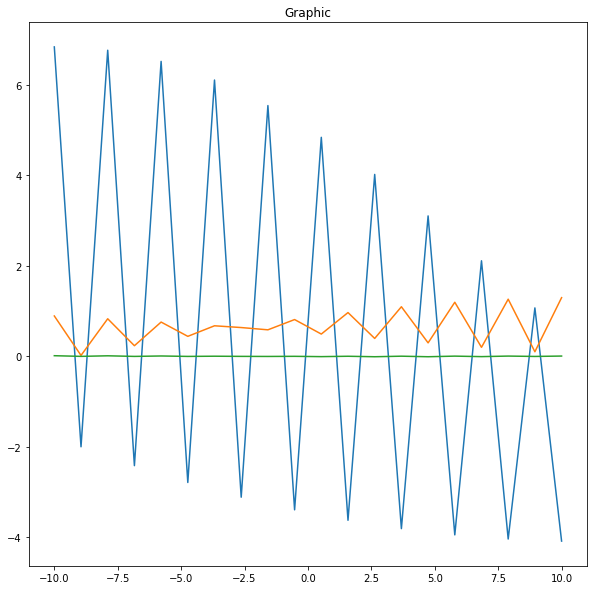

In [53]:
x_list = solver.x
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.title("Graphic")
for i in range(len(solver.psi)):
    ax.plot(x_list, solver.psi[i], label = "explicit x")